In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

In [ ]:
def linear_func(x, m, c):
    return m * x + c


In [ ]:
data= pd.read_csv('absorbancia.csv',header=1,sep=';')
data

,Long. Onda (nm),Abs,Unnamed: 2
0,2500,"0,7606466413",NaN
1,2499,"0,7621300817",NaN
2,2498,"0,7617399096",NaN
3,2497,"0,7620180845",NaN
4,2496,"0,7641199827",NaN
...,...,...,...
2296,204,"0,8693924546",NaN
2297,203,"0,9715769291",NaN
2298,202,"0,971341908",NaN
2299,201,"0,6776642799",NaN


In [ ]:
cobalto = data.iloc[:, :2]
cobalto = cobalto.applymap(lambda x: str(x).replace(',', '.') if pd.notnull(x) else x)
cobalto

,Long. Onda (nm),Abs
0,2500,0.7606466413
1,2499,0.7621300817
2,2498,0.7617399096
3,2497,0.7620180845
4,2496,0.7641199827
...,...,...
2296,204,0.8693924546
2297,203,0.9715769291
2298,202,0.971341908
2299,201,0.6776642799


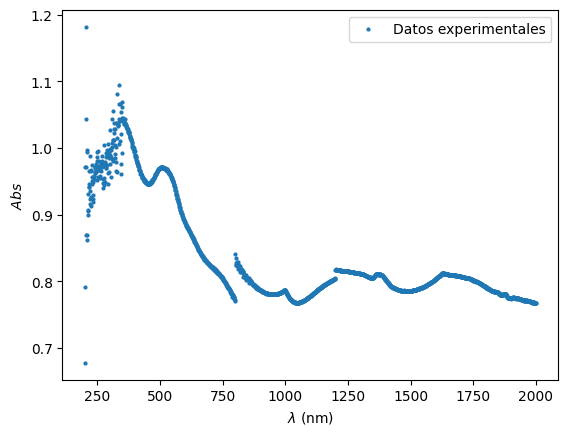

In [ ]:
cobalto = cobalto.apply(lambda col: pd.to_numeric(col, errors='coerce'))
cobalto = cobalto.loc[cobalto['Long. Onda (nm)'] <=2000]
plt.plot(cobalto['Long. Onda (nm)'], cobalto['Abs'], 'o', markersize=2, label='Datos experimentales')
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel(r'$Abs$')
plt.legend()
plt.savefig('Absorbancia.pdf')
plt.show()

In [ ]:
#Tauc method
A=cobalto['Abs']
alpha=2.303*A
E=1240/cobalto['Long. Onda (nm)']
Gap_direct=(alpha*E)**2
Gap_indirect=np.sqrt((alpha*E))

#E[1080:1141], Gap_direct[1080:1141]

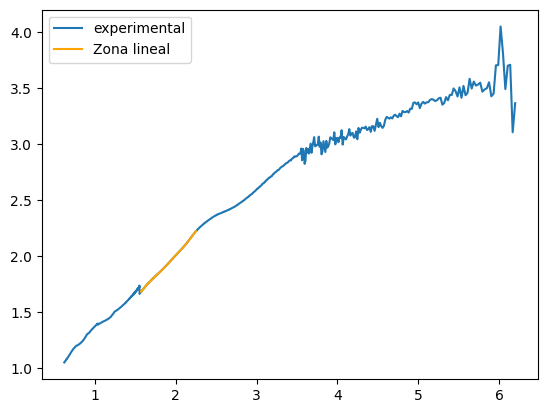

In [ ]:
#Gap indirecto
plt.plot(E,Gap_indirect, label="experimental")
plt.plot(E[1210:1450],Gap_indirect[1210:1450],color='orange', label = 'Zona lineal')
plt.legend()
plt.savefig("Absgap_indirecto.pdf")
plt.show()

In [ ]:
#Peak 1
#línea tangente
x=E[1210:1450].values
y=Gap_indirect[1210:1450].values
# Perform the curve fitting
params1, covariance1 = curve_fit(linear_func, x, y)

# Get the optimized parameters
m_opt1, c_opt1 = params1
#fitted values
y_fitted1=linear_func(x,m_opt1,c_opt1)
# Calculate the Pearson correlation coefficient
r1 = np.corrcoef(y, y_fitted1)[0, 1]  # Using numpy's corrcoef to calculate Pearson's r
error1=covariance1[0][0]/np.abs(c_opt1) + covariance1[1][1]/np.abs(m_opt1)

print(f"Pearson correlation coefficient (r): {r1}")
print(error1, f'${m_opt1}\pm{covariance1[0][0]}$', f'${c_opt1}\pm{covariance1[1][1]}$')

Pearson correlation coefficient (r): 0.9992583421271186
2.4576678735560177e-05 $0.7663286110688641\pm3.664123355713663e-06$ $0.47694865482455895\pm1.2946548255027846e-05$


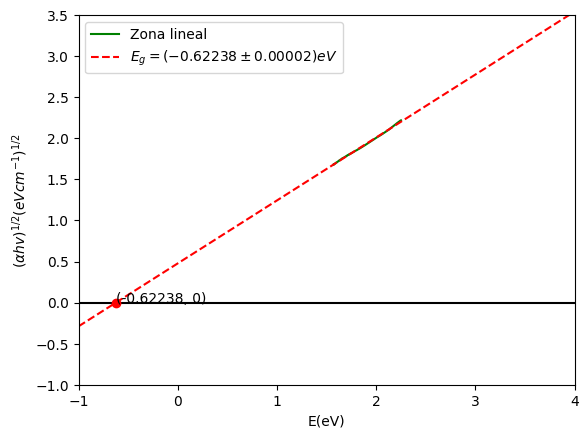

In [ ]:
x_1=np.linspace(-1,4,100)
y_1=x_1*m_opt1 +c_opt1
yo=np.linspace(0,0,100)
plt.plot(E[1210:1450],Gap_indirect[1210:1450],color='green', label = 'Zona lineal')
plt.plot(x_1, y_1,color='red', linestyle='--',label=f'$E_g=({c_opt1/(-m_opt1):.5f}\pm{error1:.5f})eV$')
plt.plot(x_1,yo,color='black',linestyle='-')
plt.plot(c_opt1/(-m_opt1), 0, 'ro')
plt.text(c_opt1/(-m_opt1), 0, f'({c_opt1/(-m_opt1):.5f}, {0})', ha='left')
plt.xlabel('E(eV)')
plt.ylabel(r'$(\alpha hv)^{1/2} (eVcm^{-1})^{1/2}$')
plt.xlim(-1, 4)  # Set the x-axis limits from 1 to 4
plt.ylim(-1, 3.5)  # Set the y-axis limits from 2 to 8
plt.legend()
plt.savefig("Absgap_indirecto_lineal.pdf")
plt.show()

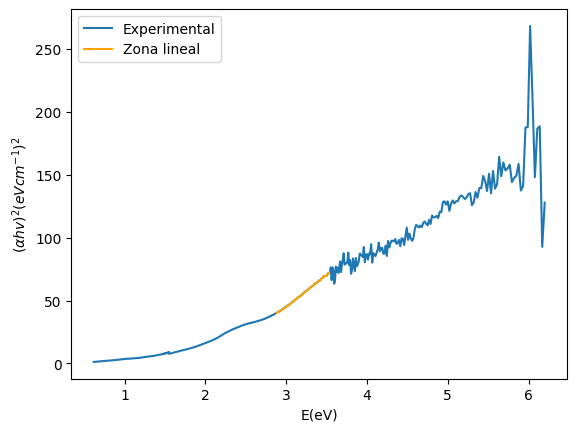

In [ ]:
#Gap directo
plt.plot(E,Gap_direct,label='Experimental')
plt.plot(E[1570:1650],Gap_direct[1570:1650],color='orange', label = 'Zona lineal')
plt.xlabel('E(eV)')
plt.ylabel(r'$(\alpha hv)^{2} (eVcm^{-1})^{2}$')
plt.legend()
plt.savefig("Absgapdirecto.pdf")
plt.show()

In [ ]:
#Peak 2
#línea tangente
x2=E[1570:1650].values
y2=Gap_direct[1570:1650].values
# Perform the curve fitting
params2, covariance2 = curve_fit(linear_func, x2,y2)

# Get the optimized parameters
m_opt2, c_opt2 = params2
#fitted values
y_fitted2=linear_func(x2,m_opt2,c_opt2)
# Calculate the Pearson correlation coefficient
r2 = np.corrcoef(y2, y_fitted2)[0, 1]  # Using numpy's corrcoef to calculate Pearson's r
error2=covariance1[0][0]/np.abs(c_opt2) + covariance2[1][1]/np.abs(m_opt2)

print(f"Pearson correlation coefficient (r): {r1}")
print(error2, f'${m_opt2}\pm{covariance2[0][0]}$', f'${c_opt2}\pm{covariance2[1][1]}$')

Pearson correlation coefficient (r): 0.9992583421271186
0.0076557835903955755 $49.9987378164211\pm0.03756342954038194$ $-104.75528253415561\pm0.38277776766289734$


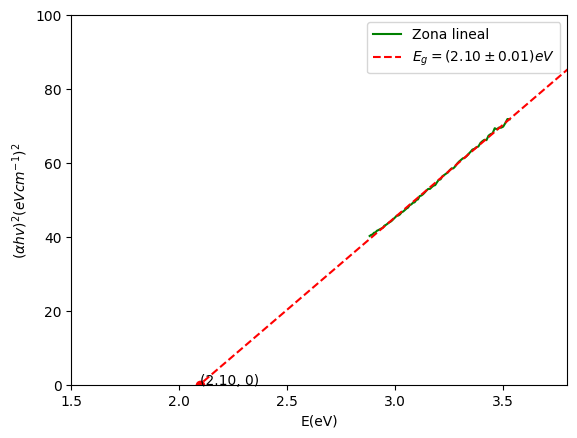

In [ ]:
x_2=np.linspace(0,4, 100)
y_2=x_2*m_opt2 +c_opt2
yo1=np.linspace(0,0,100)
plt.plot(E[1570:1650],Gap_direct[1570:1650],color='green', label = 'Zona lineal')
plt.plot(x_2, y_2,color='red',linestyle='--', label=f'$E_g=({c_opt2/(-m_opt2):.2f}\pm{error2:.2f})eV$')
plt.plot(c_opt2/(-m_opt2), 0, 'ro')
plt.text(c_opt2/(-m_opt2),0 , f'({c_opt2/(-m_opt2):.2f}, {0})', ha='left')
#plt.plot(x_2,yo1,color='black',linestyle='--')
plt.xlim(1.5, 3.8)  # Set the x-axis limits from 1 to 4
plt.ylim(0, 100)  # Set the y-axis limits from 2 to 8
plt.xlabel('E(eV)')
plt.ylabel(r'$(\alpha hv)^{2} (eVcm^{-1})^{2}$')
plt.legend()
plt.savefig("Absgapdirecto_lineal.pdf")
plt.show()